# **PCA**







#Step 1 : import libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [45]:
wine = load_wine(as_frame=True)
df = wine.frame
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [46]:
print('Original Dataframe shape :',df.shape)

Original Dataframe shape : (178, 14)


In [47]:
X = df.drop('target',axis=1)
y = df['target']

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [50]:
pca = PCA(n_components= 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



#Step 6: Fitting Logistic Regression To the training set




In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)


LogisticRegression()

#Step 7: Predicting the test set result




In [52]:
y_pred = logreg.predict(X_test_pca)

#Step 8: Making the confusion matrix




<Axes: >

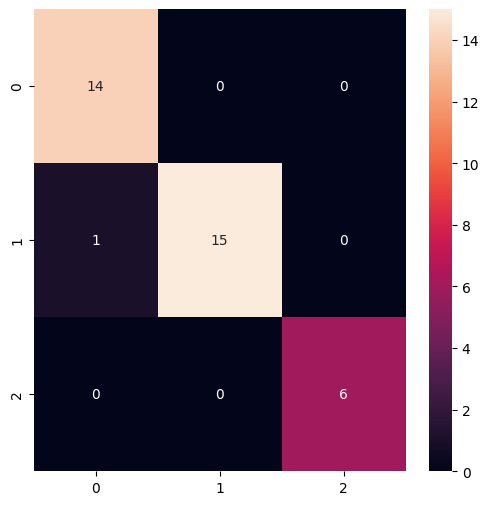

In [53]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#Step 9: Predicting the training set result




In [56]:
y_pred_train = logreg.predict(X_train_pca)

#Step 10: Visualizing the Test set results




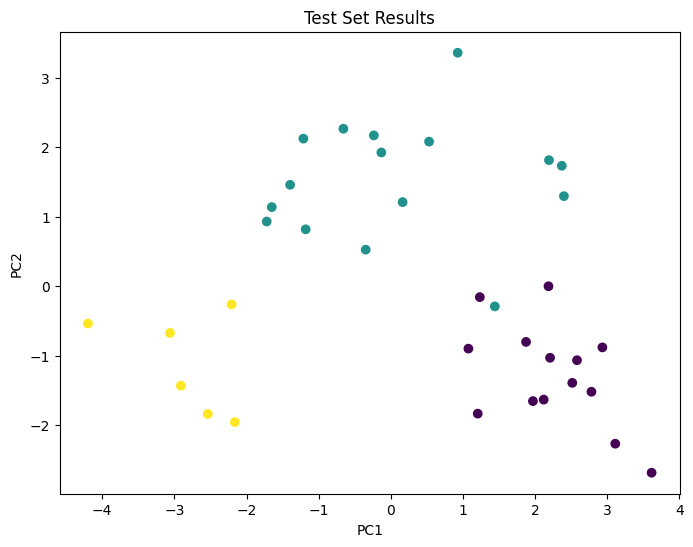

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='viridis')
plt.title('Test Set Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#**Well Done :)**
Now let's practice!